# Let's start by installing the necessary libraries:

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn flask tweepy


   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---------------------------------------- 98.5/98.5 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [9]:
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
data.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# Check the distribution of sentiments

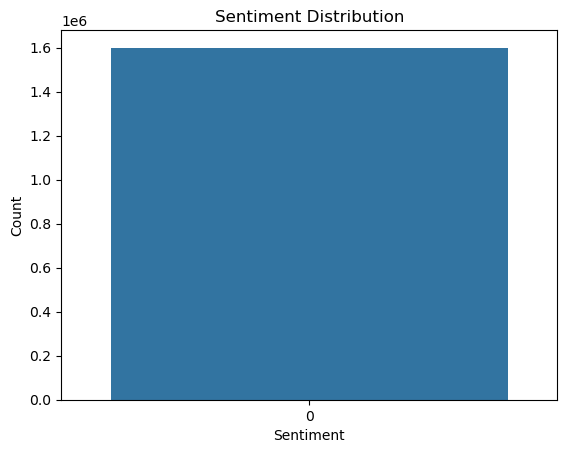

In [13]:
sns.countplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [14]:
# Display basic statistics of the text length
data['text_length'] = data['text'].apply(len)
print(data['text_length'].describe())

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


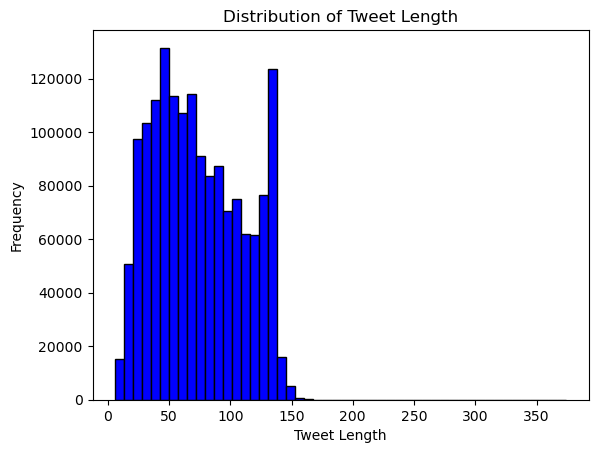

In [15]:
# Plot the distribution of text length
plt.hist(data['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Data Cleaning

In [16]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# 1. Text Cleaning: We define a function to clean the tweet text by removing URLs, mentions, hashtags, special characters, and stopwords.
# 2. Applying Cleaning Function: We apply the cleaning function to the text column and display the cleaned text.
# 3. Common Words Analysis: We identify and plot the most common words in the cleaned tweets.

In [17]:
# Define a function to clean the tweet text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [19]:
# Apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)

In [20]:
# Display the first few cleaned texts
print(data[['text', 'cleaned_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  awww thats bummer shoulda got david carr third...  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


In [21]:
# Plot the most common words
from collections import Counter

all_words = ' '.join([text for text in data['cleaned_text']])
all_words = all_words.split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

In [22]:
# Convert the common words to a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

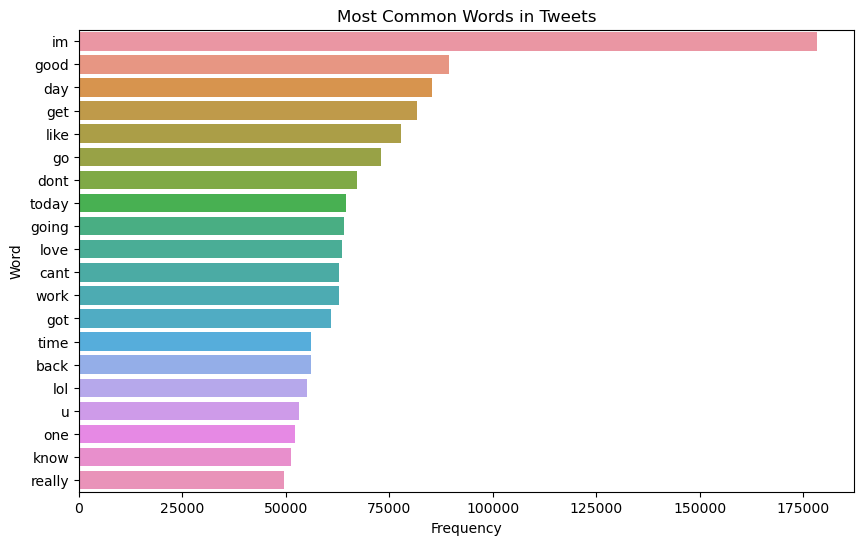

In [23]:
# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Most Common Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Text Preprocessing

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical data

In [26]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform test data
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.784053125


In [29]:
# Print classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    159494
    Positive       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



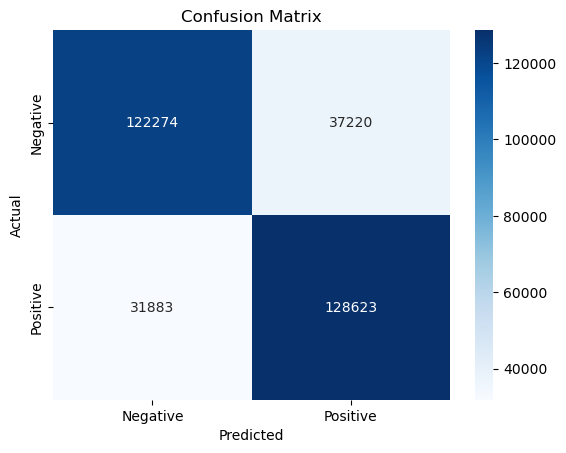

In [30]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
import joblib

# Save the model and vectorizers
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')
joblib.dump(tfidf_transformer, 'ttfidf_transformer.pkl')


['ttfidf_transformer.pkl']

In [34]:
pip install Flask


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sumed\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [36]:
python app.py

SyntaxError: invalid syntax (945115591.py, line 1)